Ha egyenletes eloszlásban érkezhetnek buszok egy év bármelyik percében, 
és átlagosan 10 perc telik el két busz érkezése között, 
egy embernek aki random pillanatban érkezik a buszmegállóba, várhatóan 10 percet kell várnia buszra

Egy éven belül generálok busz érkezéseket, és random pontokat, amikor az ember érkezik.
Két diagram 1) mennyi perc telik el két busz érkezése között 2) mennyit vár az ember

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ev_percekben = 365*24*60
busz_evente = ev_percekben/10

In [6]:
busz_erkezesek = []
for i in range(int(busz_evente) + 1):
    busz_erkezesek.append(round(np.random.uniform()*ev_percekben))
busz_erkezesek = sorted(busz_erkezesek)

In [7]:
erkezesek_kozti_ido = []
c = 0

for i in busz_erkezesek:
    erkezesek_kozti_ido.append((i-c))
    c = i

In [8]:
np.mean(erkezesek_kozti_ido)

9.999676566275376

(array([3.5826e+04, 1.1685e+04, 3.5540e+03, 1.0390e+03, 2.8900e+02,
        1.2100e+02, 3.3000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00]),
 array([  0. ,  11.8,  23.6,  35.4,  47.2,  59. ,  70.8,  82.6,  94.4,
        106.2, 118. ]),
 <a list of 10 Patch objects>)

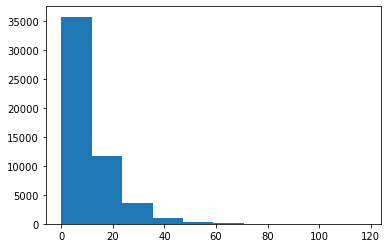

In [9]:
plt.hist(erkezesek_kozti_ido)

In [10]:
def closest(lst, K): 
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

In [11]:
wait_time = []
for i in range(500):
    ember = round(np.random.uniform()*ev_percekben)   
    legkozelebbi_busz = closest(busz_erkezesek, ember)
    if ember >= busz_erkezesek[-1]:
        continue
    elif legkozelebbi_busz < ember:
        legkozelebbi_busz = busz_erkezesek[busz_erkezesek.index(legkozelebbi_busz) + 1]
    wait_time.append((legkozelebbi_busz-ember))

In [12]:
np.mean(wait_time)

9.694

(array([ 50., 221., 108.,  60.,  30.,  21.,   5.,   1.,   2.,   2.]),
 array([-6. ,  0.9,  7.8, 14.7, 21.6, 28.5, 35.4, 42.3, 49.2, 56.1, 63. ]),
 <a list of 10 Patch objects>)

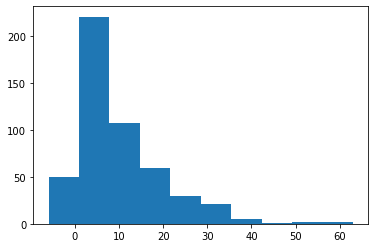

In [13]:
plt.hist(wait_time)